In [1]:
pip install alpha_vantage

  Using cached alpha_vantage-3.0.0-py3-none-any.whl.metadata (12 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
Using cached alpha_vantage-3.0.0-py3-none-any.whl (35 kB)
Using cached attrs-24.2.0-py3-none-any.whl (63 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from alpha_vantage.timeseries import TimeSeries
API_Key = 'YW20R75JUM1HQ7YS'

ts = TimeSeries(key = API_Key, output_format='pandas')

data = ts.get_monthly_adjusted('AAPL')

In [7]:
data[0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2024-10-25,229.52,237.49,221.33,231.41,231.4100,7.478906e+08,0.00
2024-09-30,228.55,233.09,213.92,233.00,233.0000,1.231814e+09,0.00
2024-08-30,224.37,232.92,196.00,229.00,229.0000,1.122667e+09,0.25
2024-07-31,212.09,237.23,211.92,222.08,221.8251,1.153193e+09,0.00
2024-06-28,192.90,220.20,192.15,210.62,210.3782,1.723984e+09,0.00
...,...,...,...,...,...,...,...
2000-04-28,135.50,139.50,104.87,124.06,0.9353,7.734290e+07,0.00
2000-03-31,118.56,150.38,114.00,135.81,1.0239,7.766390e+07,0.00
2000-02-29,104.00,119.94,97.00,114.62,0.8642,6.535520e+07,0.00


In [10]:
from alpha_vantage.timeseries import TimeSeries
key = API_Key
output_size = 'compact'
symbol = input('Ticker : ')
typ = input('Data Type - "Daily", "Weekly", "Monthly","Interval" :')

ts = TimeSeries(key,output_format='pandas')

if typ == 'daily':
    state = ts.get_daily_adjusted(symbol,outputsize=output_size)[0]
elif typ == 'weekly':
    state = ts.get_weekly_adjusted(symbol)[0]
elif typ =='monthly':
    state = ts.get_monthly_adjusted(symbol)[0]
elif typ == 'interval':
    interval = input('Interval - 1min, 5min, 10,min, 15min, 30min, 60min')
    state = ts.get_intraday(symbol,interval=interval,outputsize=output_size)[0]
else:
    print('Wrong Entry')

state

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-10-25 19:30:00,427.550,428.38,427.33,427.510,3859.0
2024-10-25 19:00:00,428.330,428.44,427.55,428.400,3595.0
2024-10-25 18:30:00,428.300,428.44,428.00,428.300,1725.0
2024-10-25 18:00:00,428.280,428.44,428.05,428.245,3008.0
2024-10-25 17:30:00,428.270,428.44,428.05,428.310,39608.0
...,...,...,...,...,...
2024-10-23 04:00:00,426.440,428.37,426.40,427.580,13621.0
2024-10-22 19:30:00,426.885,427.25,426.67,426.800,9722.0
2024-10-22 19:00:00,426.900,427.13,426.65,427.070,4444.0


## Tknider

In [13]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp311-cp311-win_amd64.whl (217 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.5 MB/s eta 0:00:02
   ------------------ --------------------- 1.0/2.2 MB 1.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 2.0 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


KeyboardInterrupt: 

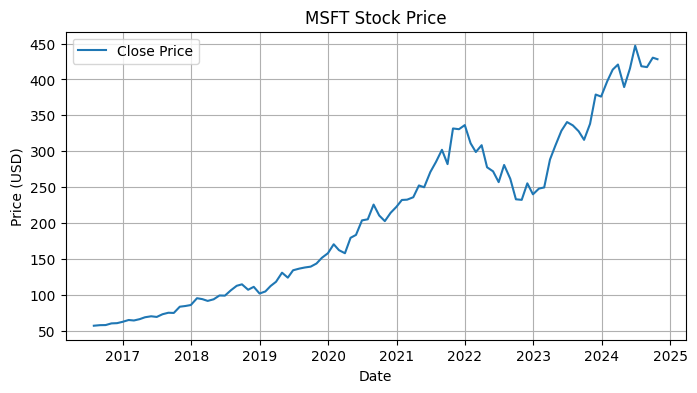

In [14]:
import tkinter as tk
from tkinter import ttk
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd

# Set up API Key and output format
API_Key = API_Key
output_size = 'compact'
ts = TimeSeries(key=API_Key, output_format='pandas')

# Function to fetch and plot data
def fetch_and_plot():
    symbol = ticker_entry.get()
    data_type = data_type_combo.get().lower()
    
    try:
        if data_type == 'daily':
            data, _ = ts.get_daily_adjusted(symbol, outputsize=output_size)
        elif data_type == 'weekly':
            data, _ = ts.get_weekly_adjusted(symbol)
        elif data_type == 'monthly':
            data, _ = ts.get_monthly_adjusted(symbol)
        elif data_type == 'interval':
            interval = interval_combo.get()
            data, _ = ts.get_intraday(symbol, interval=interval, outputsize=output_size)
        else:
            status_label.config(text='Error: Invalid Data Type')
            return
        
        # Clear status and plot data
        status_label.config(text=f"Data fetched for {symbol}")
        plot_data(data, symbol)
    
    except Exception as e:
        status_label.config(text=f"Error: {e}")

# Function to plot data using matplotlib
def plot_data(data, symbol):
    data['close'] = data['4. close']
    data = data.head(100)  # Plot only the latest 100 data points
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(data['close'], label='Close Price')
    ax.set_title(f"{symbol.upper()} Stock Price")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.legend()
    ax.grid()
    
    # Embed the plot in the Tkinter app
    for widget in plot_frame.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Set up Tkinter window
root = tk.Tk()
root.title("Stock Price Prediction")
root.geometry("600x500")

# Input fields
tk.Label(root, text="Enter Stock Ticker:").pack()
ticker_entry = tk.Entry(root)
ticker_entry.pack()

tk.Label(root, text="Select Data Type:").pack()
data_type_combo = ttk.Combobox(root, values=["Daily", "Weekly", "Monthly", "Interval"])
data_type_combo.pack()

tk.Label(root, text="Select Interval (only for Intraday):").pack()
interval_combo = ttk.Combobox(root, values=["1min", "5min", "15min", "30min", "60min"])
interval_combo.pack()

# Fetch button
fetch_button = tk.Button(root, text="Fetch Data", command=fetch_and_plot)
fetch_button.pack()

# Status label
status_label = tk.Label(root, text="")
status_label.pack()

# Frame to hold the plot
plot_frame = tk.Frame(root)
plot_frame.pack(fill=tk.BOTH, expand=True)

root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd

# Set up API Key and output format
API_Key = 'your_alpha_vantage_api_key'
output_size = 'compact'
ts = TimeSeries(key=API_Key, output_format='pandas')

# Function to fetch and display data
def fetch_and_display():
    symbol = ticker_entry.get().upper()
    data_type = data_type_combo.get().lower()

    if not symbol:
        messagebox.showwarning("Input Error", "Please enter a valid ticker symbol.")
        return
    
    try:
        # Fetch data based on the selected type
        if data_type == 'daily':
            data, _ = ts.get_daily_adjusted(symbol, outputsize=output_size)
        elif data_type == 'weekly':
            data, _ = ts.get_weekly_adjusted(symbol)
        elif data_type == 'monthly':
            data, _ = ts.get_monthly_adjusted(symbol)
        elif data_type == 'interval':
            interval = interval_combo.get()
            data, _ = ts.get_intraday(symbol, interval=interval, outputsize=output_size)
        else:
            status_label.config(text='Error: Invalid Data Type')
            return
        
        # Display real-time data summary
        latest_data = data.iloc[0]  # Latest stock data
        display_summary(symbol, latest_data)
        
        # Plot the data
        plot_data(data, symbol)
        status_label.config(text=f"Data fetched successfully for {symbol}")

    except Exception as e:
        status_label.config(text=f"Error: {e}")

# Function to display stock summary
def display_summary(symbol, latest_data):
    summary_frame.pack(fill=tk.X, pady=5)
    open_var.set(f"Open: {latest_data['1. open']:.2f}")
    high_var.set(f"High: {latest_data['2. high']:.2f}")
    low_var.set(f"Low: {latest_data['3. low']:.2f}")
    close_var.set(f"Close: {latest_data['4. close']:.2f}")
    status_label.config(text=f"Displaying data for {symbol}")

# Function to plot data using matplotlib
def plot_data(data, symbol):
    data['close'] = data['4. close']
    data = data.head(100)  # Plot the latest 100 data points

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(data['close'], label='Close Price', color='red')
    ax.set_title(f"{symbol.upper()} Stock Price", fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price (USD)', fontsize=12)
    ax.legend()
    ax.grid()
    
    # Embed the plot in Tkinter
    for widget in plot_frame.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Set up Tkinter window
root = tk.Tk()
root.title("Stock Price Prediction")
root.geometry("800x600")
root.configure(bg="lightblue")

# Header label
header = tk.Label(root, text="Stock Price Prediction", font=("Helvetica", 18, "bold"), bg="lightblue")
header.pack(pady=10)

# Input frame
input_frame = tk.Frame(root, bg="lightblue")
input_frame.pack(pady=5)

# Ticker entry
tk.Label(input_frame, text="Enter Stock Ticker:", font=("Helvetica", 12), bg="lightblue").grid(row=0, column=0, padx=5)
ticker_entry = tk.Entry(input_frame, font=("Helvetica", 12))
ticker_entry.grid(row=0, column=1, padx=5)

# Data type selection
tk.Label(input_frame, text="Select Data Type:", font=("Helvetica", 12), bg="lightblue").grid(row=1, column=0, padx=5)
data_type_combo = ttk.Combobox(input_frame, values=["Daily", "Weekly", "Monthly", "Interval"], font=("Helvetica", 12))
data_type_combo.grid(row=1, column=1, padx=5)

# Interval selection for Intraday
tk.Label(input_frame, text="Select Interval (Intraday):", font=("Helvetica", 12), bg="lightblue").grid(row=2, column=0, padx=5)
interval_combo = ttk.Combobox(input_frame, values=["1min", "5min", "15min", "30min", "60min"], font=("Helvetica", 12))
interval_combo.grid(row=2, column=1, padx=5)

# Fetch button
fetch_button = tk.Button(input_frame, text="Fetch Data", font=("Helvetica", 12, "bold"), command=fetch_and_display, bg="green", fg="white")
fetch_button.grid(row=3, column=0, columnspan=2, pady=10)

# Status label
status_label = tk.Label(root, text="", font=("Helvetica", 10), bg="lightblue")
status_label.pack()

# Summary frame to display real-time data
summary_frame = tk.Frame(root, bg="white", padx=10, pady=5, bd=2, relief="groove")
open_var = tk.StringVar()
high_var = tk.StringVar()
low_var = tk.StringVar()
close_var = tk.StringVar()

tk.Label(summary_frame, textvariable=open_var, font=("Helvetica", 12), bg="white").grid(row=0, column=0, sticky="w", padx=5)
tk.Label(summary_frame, textvariable=high_var, font=("Helvetica", 12), bg="white").grid(row=0, column=1, sticky="w", padx=5)
tk.Label(summary_frame, textvariable=low_var, font=("Helvetica", 12), bg="white").grid(row=0, column=2, sticky="w", padx=5)
tk.Label(summary_frame, textvariable=close_var, font=("Helvetica", 12), bg="white").grid(row=0, column=3, sticky="w", padx=5)

# Plot frame
plot_frame = tk.Frame(root, bg="yellow")
plot_frame.pack(fill=tk.BOTH, expand=True, pady=10)

root.mainloop()
